In [14]:
# Importing necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [15]:
# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


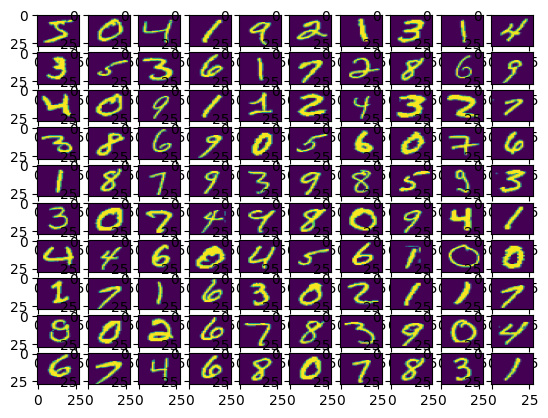

In [16]:
# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()


In [17]:
# Building the Sequential neural network model
model = Sequential([
    # Flatten input from 28x28 images to 784 (28*28) vector
    Flatten(input_shape=(28, 28)),

    # Dense layer 1 (256 neurons)
    Dense(256, activation='sigmoid'),

    # Dense layer 2 (128 neurons)
    Dense(128, activation='sigmoid'),

    # Output layer (10 classes)
    Dense(10, activation='sigmoid'),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
model.fit(x_train, y_train, epochs=50,
          batch_size=2000,
          validation_split=0.2)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.2818 - loss: 2.2041 - val_accuracy: 0.6956 - val_loss: 1.6594
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6905 - loss: 1.4841 - val_accuracy: 0.7881 - val_loss: 0.9878
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7957 - loss: 0.9101 - val_accuracy: 0.8577 - val_loss: 0.6547
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.8535 - loss: 0.6328 - val_accuracy: 0.8872 - val_loss: 0.4882
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.8838 - loss: 0.4867 - val_accuracy: 0.8978 - val_loss: 0.4019
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.8966 - loss: 0.4092 - val_accuracy: 0.9088 - val_loss: 0.3506
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9023 - loss: 0.3652 - val_accuracy: 0.9147 - val_loss: 0.3171
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.9106 - loss: 0.3302 - val_accuracy: 0.919

In [20]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.091401606798172, 0.9717000126838684]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


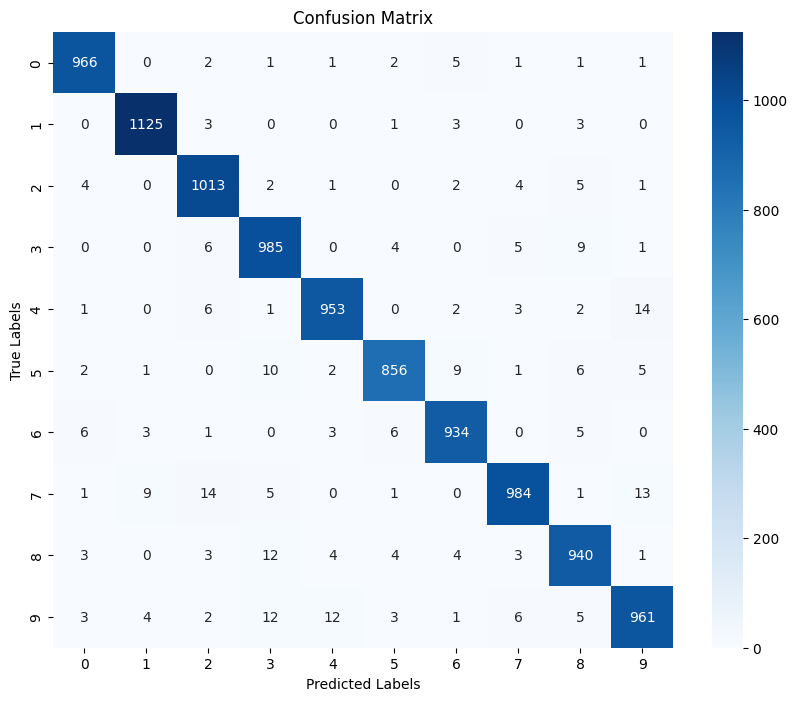

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities for test data
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()




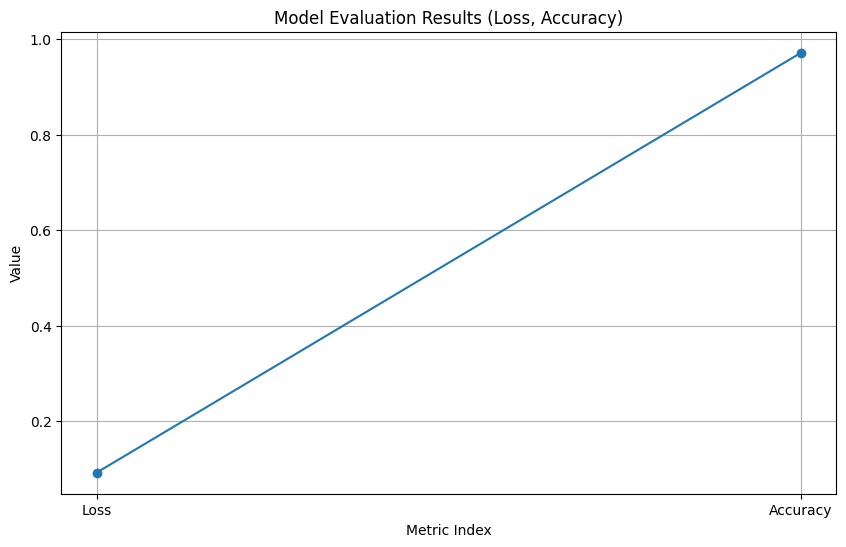

In [10]:
# Line chart
plt.figure(figsize=(10, 6))
plt.plot(results, marker='o')
plt.title("Model Evaluation Results (Loss, Accuracy)")
plt.xlabel("Metric Index")
plt.ylabel("Value")
plt.xticks([0, 1], ['Loss', 'Accuracy'])
plt.grid(True)
plt.show()


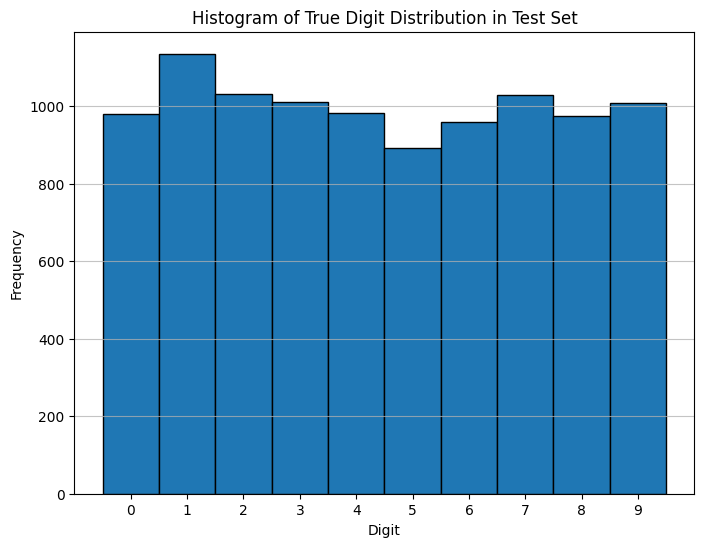

In [11]:
# Histogram of actual digits in the test set
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=np.arange(-0.5, 10.5, 1), edgecolor='black')
plt.title("Histogram of True Digit Distribution in Test Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.xticks(np.arange(10))
plt.grid(axis='y', alpha=0.75)
plt.show()


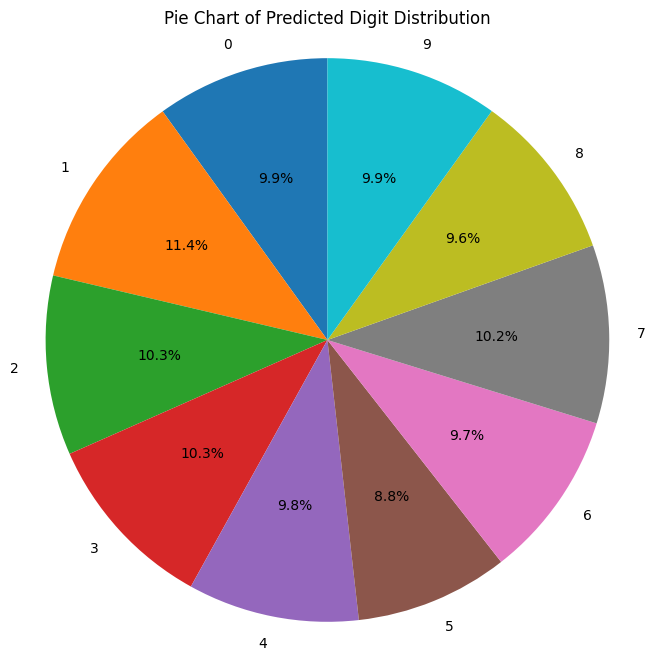

In [12]:
# Pie chart of the distribution of predicted digits
predicted_digit_counts = np.bincount(y_pred, minlength=10)
labels = [str(i) for i in range(10)]

plt.figure(figsize=(8, 8))
plt.pie(predicted_digit_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Predicted Digit Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

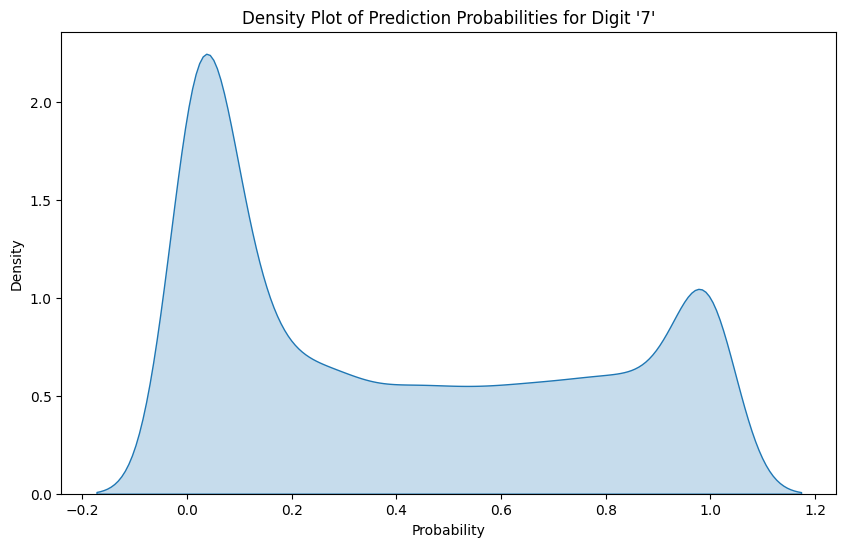

In [13]:
#Density plot
seven_probs = y_pred_probs[:, 7] # Probabilities for class 7

plt.figure(figsize=(10, 6))
sns.kdeplot(seven_probs, fill=True)
plt.title("Density Plot of Prediction Probabilities for Digit '7'")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.show()